# colabの準備

In [0]:
# !pip install hoge
# ドライブをマウント
from google.colab import drive
drive.mount('/content/gdrive')
# カレントディレクトリの変更
import os
os.chdir('/content/gdrive/My Drive/NAL-LAB/Colab Notebooks/')
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/NAL-LAB/Colab Notebooks


In [0]:
# google colab で chainer などを使うための設定

# colab の cuda に応じて、いい感じに chainer と Cupy をインストールするコマンド
!curl https://colab.chainer.org/install | sh -

# chainer のインストール確認コマンド

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1580  100  1580    0     0   8876      0 --:--:-- --:--:-- --:--:--  8926
+ apt -y -q install cuda-libraries-dev-10-0
Reading package lists...
Building dependency tree...
Reading state information...
cuda-libraries-dev-10-0 is already the newest version (10.0.130-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
+ pip install -q cupy-cuda100  chainer 
+ set +ex
Installation succeeded!


# ファイル読み込み

In [0]:
import numpy as np


In [0]:
vector_list = np.loadtxt('vector.txt', delimiter=',', dtype='float64')

In [0]:
len(vector_list)

38

In [0]:
tag_list = np.loadtxt('tag.txt', delimiter='\n', dtype='int32')

In [0]:
tag_list

In [0]:
with open("like.txt") as f:
    type(f)
    like = [s.strip() for s in f.readlines()]

In [0]:
like

In [0]:
## リストへ格納
tf_idf_vector_list = np.loadtxt('tf-idf.txt', delimiter=',', dtype='float64')
tf_vector_list = np.loadtxt('tf.txt', delimiter=',', dtype='float64')

In [0]:
len(tf_idf_vector_list)

38

In [0]:
# リストの結合
vectors = list(zip(vector_list,tag_list))
data = vectors

In [0]:
# データ分割
import pandas as pd
from sklearn.model_selection import train_test_split

In [0]:
# array1, array2 をそれぞれ分割する。
# 結果をシードで指定
data_train, data_test, labels_train, labels_test = train_test_split(vector_list, tag_list, train_size=0.75,random_state=10)
tf_data_train, tf_data_test, tf_labels_train, tf_labels_test = train_test_split(tf_vector_list, tag_list, train_size=0.75,random_state=10)
tf_idf_data_train, tf_idf_data_test,tf_idf_labels_train, tf_idf_labels_test = train_test_split(tf_idf_vector_list, tag_list, train_size=0.75,random_state=10)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
data_test

# ベイズ分類


In [0]:
import numpy as np
from sklearn.naive_bayes import GaussianNB, BernoulliNB , MultinomialNB# ガウシアン
print("Doc2Vec:")
clf = GaussianNB() # 正規分布を仮定したベイズ分類
clf.fit(data_train, labels_train) # 学習をする
print("Test set score Gaussian: {:.2f}".format(clf.score(data_test, labels_test)))

bclf = BernoulliNB()
bclf.fit(data_train, labels_train)
print("Test set score Bernoulli: {:.2f}".format(bclf.score(data_test, labels_test)))
print("TF:")
tf_clf = GaussianNB() # 正規分布を仮定したベイズ分類
tf_clf.fit(tf_data_train, tf_labels_train) # 学習をする
print("Test set score Gaussian: {:.2f}".format(tf_clf.score(tf_data_test, tf_labels_test)))

tf_bclf = BernoulliNB()
tf_bclf.fit(tf_data_train, tf_labels_train)
print("Test set score Bernoulli: {:.2f}".format(tf_bclf.score(tf_data_test, tf_labels_test)))

print("TF-IDF")
tf_idf_clf = GaussianNB() # 正規分布を仮定したベイズ分類
tf_idf_clf.fit(tf_idf_data_train, tf_idf_labels_train) # 学習をする
print("Test set score Gaussian: {:.2f}".format(tf_idf_clf.score(tf_idf_data_test, tf_idf_labels_test)))

tf_idf_bclf = BernoulliNB()
tf_idf_bclf.fit(tf_idf_data_train, tf_idf_labels_train)
print("Test set score Bernoulli: {:.2f}".format(tf_idf_bclf.score(tf_idf_data_test, tf_idf_labels_test)))




# mclf = MultinomialNB()
# mclf.fit(data_train, labels_train)
# print("Test set score Multinomial: {:.2f}".format(mclf.score(data_test, labels_test)))

Doc2Vec:
Test set score Gaussian: 0.38
Test set score Bernoulli: 0.62
TF:
Test set score Gaussian: 0.62
Test set score Bernoulli: 0.75
TF-IDF
Test set score Gaussian: 0.38
Test set score Bernoulli: 0.75


In [0]:
 labels_train

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1], dtype=int32)

# ロジスティクス回帰

In [0]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression().fit(data_train, labels_train)#トレーニング用データで学習させ

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# ロジスティクス回帰でdoc2vecによるベクトル化を分類
print("Test set score: {:.2f}".format(logreg.score(data_test, labels_test)))#テスト用データで精度を測る

Test set score: 0.62


# 交差検証
k分割交差検証

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [0]:
logreg = LogisticRegression().fit(data_train, labels_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# Doc2Vecのベクトルについて

In [0]:
# cross_val_scoreでk分割交差検証
scores = cross_val_score(logreg, data_test, labels_test,cv=4)
print("Cross-validation scores: {}".format(scores))
# 平均をとって
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [1.  0.  0.5 0.5]
Average cross-validation score: 0.50


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# tf

In [0]:
tf_logreg = LogisticRegression().fit(tf_data_train, tf_labels_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
scores = cross_val_score(tf_logreg, tf_data_test, tf_labels_test)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.66666667 0.66666667 0.5       ]
Average cross-validation score: 0.61


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# cross_val_scoreでk分割交差検証
scores = cross_val_score(logreg, tf_data_train, tf_labels_train,cv=10)
print("Cross-validation scores: {}".format(scores))
# 平均をとって
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.5        0.5        0.66666667 0.66666667 0.66666667 1.
 0.66666667 0.66666667 0.5        0.5       ]
Average cross-validation score: 0.63


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

# ベイズ分類でk分割交差検証

In [0]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB , MultinomialNB# ガウシアン

print("Doc2Vec:")
clf = GaussianNB() # 正規分布を仮定したベイズ分類
clf.fit(data_train, labels_train) # 学習をする
clf_pred = clf.predict(data_test) # 予測
print("Test set score Gaussian: {:.2f}".format(clf.score(data_test, labels_test)))
scores = cross_val_score(clf, data_test, labels_test,cv=4)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Cross-validation scores: {}".format(scores))


bclf = BernoulliNB()
bclf.fit(data_train, labels_train)
bclf_pred = bclf.predict(data_test) # 予測
print("Test set score Bernoulli: {:.2f}".format(bclf.score(data_test, labels_test)))
scores = cross_val_score(bclf, data_test, labels_test,cv=4)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Cross-validation scores: {}".format(scores))


print("TF:")
tf_clf = GaussianNB() # 正規分布を仮定したベイズ分類
tf_clf.fit(tf_data_train, tf_labels_train) # 学習をする
tf_clf_pred = tf_clf.predict(tf_data_test) # 予測
print("Test set score Gaussian: {:.2f}".format(tf_clf.score(tf_data_test, tf_labels_test)))
scores = cross_val_score(tf_clf, tf_data_test, tf_labels_test,cv=4)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Cross-validation scores: {}".format(scores))


tf_bclf = BernoulliNB()
tf_bclf.fit(tf_data_train, tf_labels_train)
tf_bclf_pred = tf_bclf.predict(tf_data_test) # 予測
print("Test set score Bernoulli: {:.2f}".format(tf_bclf.score(tf_data_test, tf_labels_test)))
scores = cross_val_score(tf_bclf, tf_data_test, tf_labels_test,cv=4)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Cross-validation scores: {}".format(scores))


print("TF-IDF")
tf_idf_clf = GaussianNB() # 正規分布を仮定したベイズ分類
tf_idf_clf.fit(tf_idf_data_train, tf_idf_labels_train) # 学習をする
tf_idf_clf_pred = tf_idf_clf.predict(tf_idf_data_test) # 予測
print("Test set score Gaussian: {:.2f}".format(tf_idf_clf.score(tf_idf_data_test, tf_idf_labels_test)))
scores = cross_val_score(tf_idf_clf, tf_idf_data_test, tf_idf_labels_test,cv=4)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Cross-validation scores: {}".format(scores))


tf_idf_bclf = BernoulliNB()
tf_idf_bclf.fit(tf_idf_data_train, tf_idf_labels_train)
tf_idf_bclf_pred = tf_idf_bclf.predict(tf_idf_data_test) # 予測
print("Test set score Bernoulli: {:.2f}".format(tf_idf_bclf.score(tf_idf_data_test, tf_idf_labels_test)))
scores = cross_val_score(tf_idf_bclf, tf_idf_data_test, tf_idf_labels_test,cv=4)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Cross-validation scores: {}".format(scores))


Doc2Vec:
Test set score Gaussian: 0.50
Average cross-validation score: 0.50
Cross-validation scores: [0.5 0.5 0.5 0.5]
Test set score Bernoulli: 0.88
Average cross-validation score: 0.50
Cross-validation scores: [1.  0.5 0.  0.5]
TF:
Test set score Gaussian: 0.38
Average cross-validation score: 1.00
Cross-validation scores: [1. 1. 1. 1.]
Test set score Bernoulli: 0.50
Average cross-validation score: 0.62
Cross-validation scores: [0.5 0.5 0.5 1. ]
TF-IDF
Test set score Gaussian: 0.38
Average cross-validation score: 1.00
Cross-validation scores: [1. 1. 1. 1.]
Test set score Bernoulli: 0.50
Average cross-validation score: 0.62
Cross-validation scores: [0.5 0.5 0.5 1. ]


# ロジスティック回帰でk分割交差検証
TFにエラーを吐くので,中止
ValueError: operands could not be broadcast together with shapes (8,212) (300,) 


In [0]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression().fit(data_train, labels_train)#トレーニング用データで学習させ
# ロジスティクス回帰でdoc2vecによるベクトル化を分類
print("Test set score: {:.2f}".format(logreg.score(data_test, labels_test)))#テスト用データで精度を測る

Test set score: 0.62


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
print("Doc2Vec:")
logreg = LogisticRegression().fit(data_train, labels_train)#トレーニング用データで学習させ
print("Test set score Gaussian: {:.2f}".format(clf.score(data_test, labels_test)))
scores = cross_val_score(logreg, data_test, labels_test)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Cross-validation scores: {}".format(scores))

print("TF:")
logreg = LogisticRegression().fit(tf_data_train, tf_labels_train)#トレーニング用データで学習させ
print("Test set score Gaussian: {:.2f}".format(clf.score(tf_data_test, tf_labels_test)))
scores = cross_val_score(logreg, tf_data_test, tf_labels_test)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Cross-validation scores: {}".format(scores))

Doc2Vec:
Test set score Gaussian: 0.38
Average cross-validation score: 0.39
Cross-validation scores: [0.33333333 0.33333333 0.5       ]
TF:


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be change

ValueError: ignored

In [0]:
print("Doc2Vec:")
logreg = LogisticRegression().fit(data_train, labels_train)#トレーニング用データで学習させ
print("Test set score Gaussian: {:.2f}".format(clf.score(data_test, labels_test)))
scores = cross_val_score(logreg, data_test, labels_test)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Cross-validation scores: {}".format(scores))

Doc2Vec:
Test set score Gaussian: 0.38
Average cross-validation score: 0.39
Cross-validation scores: [0.33333333 0.33333333 0.5       ]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be change

# 混同行列


In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [0]:
print("Doc2Vec:")
clf = GaussianNB() # 正規分布を仮定したベイズ分類
clf.fit(data_train, labels_train) # 学習をする
clf_pred = clf.predict(data_test) # 予測
print("Test set score Gaussian: {:.2f}".format(clf.score(data_test, labels_test)))
scores = cross_val_score(clf, data_test, labels_test,cv=3)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Cross-validation scores: {}".format(scores))
print(confusion_matrix(labels_test, clf_pred))


bclf = BernoulliNB()
bclf.fit(data_train, labels_train)
bclf_pred = bclf.predict(data_test) # 予測
print("Test set score Bernoulli: {:.2f}".format(bclf.score(data_test, labels_test)))
scores = cross_val_score(bclf, data_test, labels_test,cv=3)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Cross-validation scores: {}".format(scores))
print(confusion_matrix(labels_test, bclf_pred))


print("TF:")
tf_clf = GaussianNB() # 正規分布を仮定したベイズ分類
tf_clf.fit(tf_data_train, tf_labels_train) # 学習をする
tf_clf_pred = tf_clf.predict(tf_data_test) # 予測
print("Test set score Gaussian: {:.2f}".format(tf_clf.score(tf_data_test, tf_labels_test)))
scores = cross_val_score(tf_clf, tf_data_test, tf_labels_test,cv=3)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Cross-validation scores: {}".format(scores))
print(confusion_matrix(tf_labels_test, tf_clf_pred))


tf_bclf = BernoulliNB()
tf_bclf.fit(tf_data_train, tf_labels_train)
tf_bclf_pred = tf_bclf.predict(tf_data_test) # 予測
print("Test set score Bernoulli: {:.2f}".format(tf_bclf.score(tf_data_test, tf_labels_test)))
scores = cross_val_score(tf_bclf, tf_data_test, tf_labels_test,cv=3)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Cross-validation scores: {}".format(scores))
print(confusion_matrix(tf_labels_test, tf_bclf_pred))


print("TF-IDF:")
tf_idf_clf = GaussianNB() # 正規分布を仮定したベイズ分類
tf_idf_clf.fit(tf_idf_data_train, tf_idf_labels_train) # 学習をする
tf_idf_clf_pred = tf_idf_clf.predict(tf_idf_data_test) # 予測
print("Test set score Gaussian: {:.2f}".format(tf_idf_clf.score(tf_idf_data_test, tf_idf_labels_test)))
scores = cross_val_score(tf_idf_clf, tf_idf_data_test, tf_idf_labels_test,cv=3)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Cross-validation scores: {}".format(scores))
print(confusion_matrix(tf_idf_labels_test, tf_idf_clf_pred))


tf_idf_bclf = BernoulliNB()
tf_idf_bclf.fit(tf_idf_data_train, tf_idf_labels_train)
tf_idf_bclf_pred = tf_idf_bclf.predict(tf_idf_data_test) # 予測
print("Test set score Bernoulli: {:.2f}".format(tf_idf_bclf.score(tf_idf_data_test, tf_idf_labels_test)))
scores = cross_val_score(tf_idf_bclf, tf_idf_data_test, tf_idf_labels_test,cv=3)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Cross-validation scores: {}".format(scores))
print(confusion_matrix(tf_idf_labels_test, tf_idf_bclf_pred))


Doc2Vec:
Test set score Gaussian: 0.60
Average cross-validation score: 0.61
Cross-validation scores: [0.5        0.66666667 0.66666667]
[[2 2]
 [2 4]]
Test set score Bernoulli: 0.70
Average cross-validation score: 0.42
Cross-validation scores: [0.25 0.   1.  ]
[[3 1]
 [2 4]]
TF:
Test set score Gaussian: 0.40
Average cross-validation score: 1.00
Cross-validation scores: [1. 1. 1.]
[[2 2]
 [4 2]]
Test set score Bernoulli: 0.60
Average cross-validation score: 0.61
Cross-validation scores: [0.5        0.66666667 0.66666667]
[[0 4]
 [0 6]]
TF-IDF:
Test set score Gaussian: 0.40
Average cross-validation score: 1.00
Cross-validation scores: [1. 1. 1.]
[[2 2]
 [4 2]]
Test set score Bernoulli: 0.60
Average cross-validation score: 0.61
Cross-validation scores: [0.5        0.66666667 0.66666667]
[[0 4]
 [0 6]]


In [0]:
print(len(labels_train))
print(len(labels_test))
print(len(clf_pred))



30
8
8


In [0]:
!pip install useful_graphs

  Stored in directory: /root/.cache/pip/wheels/94/86/80/2f601e27d80f364cc11d4ed4628cdf09338c9b1776f8d84f60
Successfully built useful-graphs


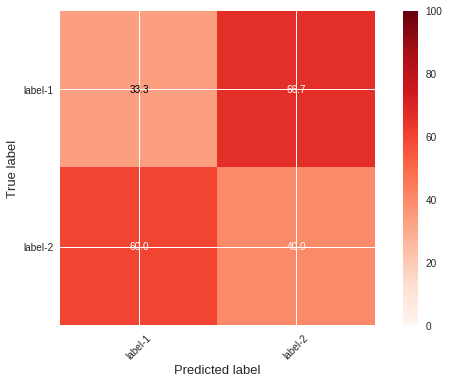

In [0]:
import numpy as np
import useful_graphs
conf = confusion_matrix(labels_test, clf_pred)
classes = ['label-1', 'label-2']
cm = useful_graphs.ConfusionMatrix(conf, class_list=classes)
cm.plot(to_normalize=True)

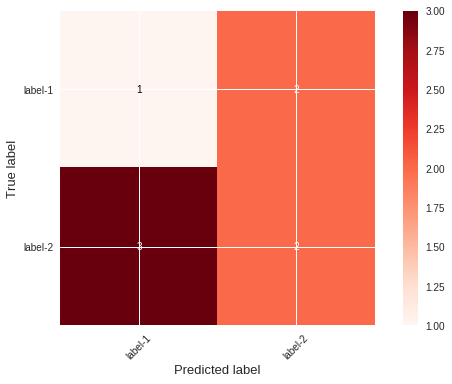

In [0]:
cm.plot(save_path="path_to_figure.pdf")

vec

In [0]:
len(vector_list)

38

In [0]:
tf_data_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.28867513, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [0]:
tf_labels_train

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1], dtype=int32)

In [0]:
tf_clf_pred

array([1, 0, 1, 0, 0, 0, 1, 0], dtype=int32)

In [0]:
tf_labels_test

array([0, 0, 1, 0, 1, 1, 0, 1], dtype=int32)

In [0]:
len(venctor_list[0])

NameError: ignored